In [1]:
import nltk
import os
import pandas as pd
import re
from nltk import *
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import stem
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import treebank
import csv
import itertools
import collections
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Make possible for python notebooks to import the util as module. This needs to be copied at every python notebook which wants to 
load the module'''

import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path


class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing Jupyter notebook from %s" % path)
                                       
        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)

        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod


class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]
    
sys.meta_path.append(NotebookFinder())

In [3]:
import tm_assignment_util as util
myutilObj = util.util()


importing Jupyter notebook from tm_assignment_util.ipynb
['catch', 'machine', 'accident', 'inspect', 'maintain', 'excavator', 'magnet', 'machine', 'maintenance', 'carry', 'make', 'jump', 'grappler', 'turn', 'excavator', 'engine', 'grappler', 'spin', 'pin', 'grappler', 'excavator']


In [4]:
summary=util.X_Cases_Osha_Predict
stopwords=nltk.corpus.stopwords.words('english')
user_defined_stop_words=['employee','employees','worker','workers','fall','falls','shock','amputation','employee',"victim", "suddenly", "crane", "worker", "incident", "work", "three", "died","hospital", "place", "time",
                 "involving", "occured", "occurred", "fell", "another", "prior", "caused", "height", "working", "found",
                 "came", "trying", "due", "happened","back","performing","carrying","using","poor","two","colleague","lost","meter",
                 "july", "whole"]                    
new_stop_words=stopwords+user_defined_stop_words
body_parts=['abdomen','finger','leg','head','wrist','pelvis','shoulder','spine','elbow','knee','hands','arm','face','eye','eyes','ear','ears','forearm','eyelid','mouth','stomach','torso','throat','cheek',
            'groin','chin','forehead','legs','thorax','biceps','buttock','hands','legs','nose','knees','arms','forearm','thumb','toe','ankle','femur','hip','calf','heel','jaw','shin','temple'
           'ribs','knucle','chest','thigh','rib','spinal','skull','lip','lips','waist','teeth','testicle','testicles']

grammar = r"""
  NP: {<NN>}
   {<NN>+}
      {<NNS>}
      {<NNP>}
      {<NNPS>}
      
"""
cp = nltk.RegexpParser(grammar)
body_parts_list = [] 

noun_phrase_count=0


In [5]:
#noun_phrase_count=0
for word in summary:
    # Convert all characters to Lower case
    text=word.lower()
    token = nltk.word_tokenize(text)
    token=[word.lower() for word in token if word not in new_stop_words]
    token=[word.lower() for word in token if word in body_parts]
    pos_tagged_preProcess = nltk.pos_tag(token)
    nouns = cp.parse(pos_tagged_preProcess)
    for subtree in nouns.subtrees(filter=lambda t: t.label() == 'NP'):
        noun_phrase_count=noun_phrase_count+1
        body_parts_list.append(' '.join(word for word,postype in subtree.leaves()))
        #re.sub('\s+',' ',body_parts_list)  
        #break 

In [6]:
freqdist=FreqDist(body_parts_list)

In [7]:
freqdist

FreqDist({'abdomen': 132,
          'ankle': 296,
          'arm': 1546,
          'arms': 356,
          'biceps': 4,
          'buttock': 13,
          'calf': 27,
          'cheek': 17,
          'chest': 420,
          'chin': 22,
          'ear': 23,
          'ears': 19,
          'elbow': 161,
          'eye': 331,
          'eyelid': 1,
          'eyes': 151,
          'face': 889,
          'femur': 83,
          'finger': 2934,
          'forearm': 188,
          'forehead': 38,
          'groin': 31,
          'hands': 506,
          'head': 2092,
          'heel': 39,
          'hip': 259,
          'jaw': 84,
          'knee': 271,
          'knees': 53,
          'leg': 1288,
          'legs': 360,
          'lip': 46,
          'lips': 7,
          'mouth': 50,
          'nose': 17,
          'pelvis': 137,
          'rib': 73,
          'shin': 11,
          'shoulder': 355,
          'skull': 113,
          'spinal': 21,
          'spine': 47,
          'stomach': 65,


In [8]:
print(freqdist)

<FreqDist with 54 samples and 14773 outcomes>


           Frequency
Bodyparts           
finger          2934
head            2092
arm             1546
leg             1288
face             889
hands            506
thumb            500
chest            420
legs             360
arms             356


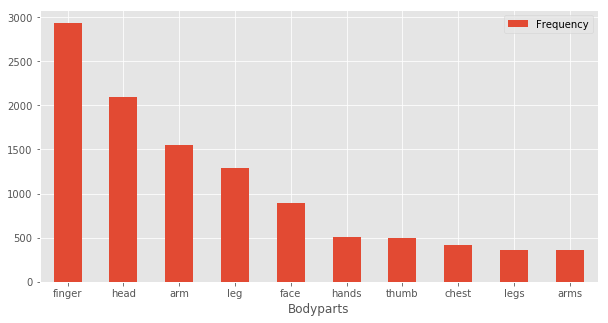

In [9]:
top_N = 10

rslt = pd.DataFrame(freqdist.most_common(top_N),
                    columns=['Bodyparts', 'Frequency']).set_index('Bodyparts')
print(rslt)
print('=' * 60)


plt.style.use('ggplot')
rslt.plot.bar(rot=0, figsize=(10,5))
plt.show()